In [261]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import numpy as np

In [262]:
df = pd.read_csv('FinancialMarketData.csv')
print(df.head())

   Y       Data  XAU BGNL  ECSURPUS    BDIY     CRY     DXY     JPY    GBP  \
0  0  1/11/2000    283.25     0.077  1388.0  157.26  100.56  105.86  1.646   
1  0  1/18/2000    287.65     0.043  1405.0  165.01  101.86  105.47  1.638   
2  0  1/25/2000    287.15     0.135  1368.0  167.24  102.41  106.04  1.650   
3  0   2/1/2000    282.75     0.191  1311.0  166.85  104.92  107.85  1.611   
4  1   2/8/2000    298.40     0.312  1277.0  165.43  104.22  109.30  1.611   

     Cl1  ...  LP01TREU  EMUSTRUU  LF94TRUU     MXUS    MXEU     MXJP    MXBR  \
0  25.77  ...   116.464   230.527   123.762  1416.12  127.75   990.59  856.76   
1  28.85  ...   117.267   231.377   123.762  1428.79  129.50   993.98  925.22   
2  28.28  ...   117.995   232.390   123.762  1385.93  126.48   974.83  886.93   
3  28.22  ...   120.510   231.942   122.328  1385.31  129.19  1007.12  842.60   
4  28.02  ...   118.791   237.812   122.328  1411.95  134.67  1034.58  945.15   

     MXRU    MXIN   MXCN  
0  224.33  217.34

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1111 non-null   int64  
 1   Data       1111 non-null   object 
 2   XAU BGNL   1111 non-null   float64
 3   ECSURPUS   1111 non-null   float64
 4   BDIY       1111 non-null   float64
 5   CRY        1111 non-null   float64
 6   DXY        1111 non-null   float64
 7   JPY        1111 non-null   float64
 8   GBP        1111 non-null   float64
 9   Cl1        1111 non-null   float64
 10  VIX        1111 non-null   float64
 11  USGG30YR   1111 non-null   float64
 12  GT10       1111 non-null   float64
 13  USGG2YR    1111 non-null   float64
 14  USGG3M     1111 non-null   float64
 15  US0001M    1111 non-null   float64
 16  GTDEM30Y   1111 non-null   float64
 17  GTDEM10Y   1111 non-null   float64
 18  GTDEM2Y    1111 non-null   float64
 19  EONIA      1111 non-null   float64
 20  GTITL30Y

In [264]:
#see how data is different based on another category (anomalies or not)
df[df['Y'] == 0].describe()
df[df['Y'] == 1].describe()
#notice that the mean between no anomalies and anomalies are around the same; you would think ppl typically would buy more as a safe haven

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,LP01TREU,EMUSTRUU,LF94TRUU,MXUS,MXEU,MXJP,MXBR,MXRU,MXIN,MXCN
count,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,1.0,976.511646,-0.024734,1936.683544,235.535947,93.189671,102.879072,1.531673,57.220928,29.919283,...,187.850703,603.550203,236.234658,1346.991603,97.742954,677.544473,1820.982785,563.226160,546.082785,46.830295
std,0.0,568.765356,0.390920,2001.477121,74.312577,13.999697,16.265108,0.170275,30.343985,11.210110,...,99.179127,301.127765,80.027618,630.095194,22.433593,196.878357,1096.095815,328.954032,355.435302,23.242389
min,1.0,256.680000,-0.974000,345.000000,106.293000,72.369000,75.940000,1.172000,10.010000,13.710000,...,80.797000,237.812000,122.002000,663.690000,56.300000,431.710000,280.500000,151.250000,112.600000,13.460000
25%,1.0,317.050000,-0.289000,971.000000,173.740000,80.899000,89.870000,1.442000,29.480000,21.910000,...,106.475000,278.383000,144.784000,973.590000,80.820000,504.330000,768.910000,272.040000,177.450000,25.410000
50%,1.0,901.750000,-0.013000,1366.000000,215.880000,87.581000,107.340000,1.533000,45.940000,27.050000,...,150.307000,554.560000,247.689000,1193.170000,92.830000,616.170000,1711.270000,533.560000,589.570000,52.290000
75%,1.0,1601.320000,0.285000,1795.000000,297.170000,106.800000,117.280000,1.585000,86.890000,35.080000,...,239.939000,810.849000,302.006000,1351.480000,117.180000,852.730000,2807.800000,767.290000,707.360000,59.980000
max,1.0,1975.060000,0.869000,11039.000000,467.570000,119.620000,133.940000,2.085000,140.970000,75.910000,...,418.688000,1252.322000,387.906500,3414.210000,144.000000,1082.580000,4430.990000,1562.150000,1395.800000,104.220000


In [265]:
def create_financial_split(df, train_years=4, validation_weeks=52, test_weeks=52):
  #convert  date column to date time if not already
  df['Data'] = pd.to_datetime(df['Data'])
  df = df.sort_values('Data')

  #calculate sizes
  train_size = train_years *52
  total_required_size = train_size + validation_weeks + test_weeks

  if len(df) < total_required_size:
    raise ValueError("Not enough data")

  #create splits
  train_end = train_size
  val_end = train_end+validation_weeks

  train_data = df.iloc[:train_end]
  validation_data = df.iloc[train_end:val_end]
  test_data = df.iloc[val_end:val_end+test_weeks]

  #Verify splits
  print(f"Train period: {train_data['Data'].min()} to {train_data['Data'].max()}")
  print(f"Validate period: {validation_data['Data'].min()} to {validation_data['Data'].max()}")
  print(f"Test period: {test_data['Data'].min()} to {test_data['Data'].max()}")

  return train_data, validation_data, test_data

In [266]:
#split the data
train_data, val_data, test_data = create_financial_split(df)

Train period: 2000-01-11 00:00:00 to 2003-12-30 00:00:00
Validate period: 2004-01-06 00:00:00 to 2004-12-28 00:00:00
Test period: 2005-01-04 00:00:00 to 2005-12-27 00:00:00


In [267]:
#create columns of mavg(moving averages) for each category
df['VIXmavg'] = df['VIX'].rolling(window=10).mean()
df['JPYmavg'] = df['JPY'].rolling(window=10).mean()
df['USSG2YRmavg'] = df['USGG2YR'].rolling(window=10).mean()
df['MXUSmavg'] = df['MXUS'].rolling(window=10).mean()
df['XAUmavg'] = df['XAU BGNL'].rolling(window=10).mean()
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,MXJP,MXBR,MXRU,MXIN,MXCN,VIXmavg,JPYmavg,USSG2YRmavg,MXUSmavg,XAUmavg
0,0,2000-01-11,283.25,0.077,1388.0,157.2600,100.560,105.86,1.6460,25.77,...,990.59,856.76,224.33,217.34,34.30,NaN,NaN,NaN,NaN,NaN
1,0,2000-01-18,287.65,0.043,1405.0,165.0100,101.860,105.47,1.6380,28.85,...,993.98,925.22,234.37,227.08,32.74,NaN,NaN,NaN,NaN,NaN
2,0,2000-01-25,287.15,0.135,1368.0,167.2400,102.410,106.04,1.6500,28.28,...,974.83,886.93,216.82,233.00,32.46,NaN,NaN,NaN,NaN,NaN
3,0,2000-02-01,282.75,0.191,1311.0,166.8500,104.920,107.85,1.6110,28.22,...,1007.12,842.60,201.89,237.48,31.29,NaN,NaN,NaN,NaN,NaN
4,1,2000-02-08,298.40,0.312,1277.0,165.4300,104.220,109.30,1.6110,28.02,...,1034.58,945.15,218.00,258.02,31.32,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,2021-03-23,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,1199.57,1671.73,681.21,1695.96,110.83,22.624,106.135,0.12862,3789.708,1788.307
1107,0,2021-03-30,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,1206.29,1635.57,693.38,1690.76,108.80,22.261,106.776,0.13017,3801.801,1772.581
1108,0,2021-04-06,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,1194.62,1689.62,673.20,1689.48,111.92,21.771,107.396,0.13372,3821.382,1761.637
1109,0,2021-04-13,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,1197.06,1680.82,680.23,1672.46,108.40,20.880,107.805,0.13829,3849.569,1752.382


In [268]:
#clean dataset
df = df.dropna()
df

,Y,Data,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,...,MXJP,MXBR,MXRU,MXIN,MXCN,VIXmavg,JPYmavg,USSG2YRmavg,MXUSmavg,XAUmavg
9,0,2000-03-14,289.60,0.488,1645.0,175.6700,105.200,104.84,1.5750,31.69,...,943.05,868.24,263.28,253.36,27.35,23.259,107.508,6.52310,1369.116,292.350
10,0,2000-03-21,290.83,0.566,1624.0,171.2500,105.810,106.98,1.5720,28.00,...,987.77,905.21,249.45,238.15,25.74,23.179,107.620,6.53050,1373.205,293.108
11,0,2000-03-28,279.90,0.572,1627.0,170.0500,105.530,105.93,1.5880,27.09,...,1009.10,914.40,268.41,259.64,27.33,23.515,107.666,6.54380,1377.808,292.333
12,0,2000-04-04,287.40,0.631,1676.0,166.0100,105.170,104.66,1.6020,25.45,...,1039.55,864.74,267.67,226.13,26.42,23.925,107.528,6.53140,1385.760,292.358
13,0,2000-04-11,281.70,0.509,1684.0,162.6300,105.940,107.04,1.5870,24.14,...,1028.54,860.38,259.18,262.49,26.46,24.305,107.447,6.50710,1394.104,292.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,0,2021-03-23,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,...,1199.57,1671.73,681.21,1695.96,110.83,22.624,106.135,0.12862,3789.708,1788.307
1107,0,2021-03-30,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,...,1206.29,1635.57,693.38,1690.76,108.80,22.261,106.776,0.13017,3801.801,1772.581
1108,0,2021-04-06,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,...,1194.62,1689.62,673.20,1689.48,111.92,21.771,107.396,0.13372,3821.382,1761.637
1109,0,2021-04-13,1742.69,0.467,2140.0,188.1368,91.852,109.19,1.3737,60.18,...,1197.06,1680.82,680.23,1672.46,108.40,20.880,107.805,0.13829,3849.569,1752.382


In [269]:
#find correlation matrix (1: positive correlation, -1: negative correlation, 0: no correlation)
df_new = df[df.columns[-5:]]
corr= df_new.corr(method = 'pearson')
corr

,VIXmavg,JPYmavg,USSG2YRmavg,MXUSmavg,XAUmavg
VIXmavg,1.000000,-0.136956,-0.108899,-0.241956,-0.081508
JPYmavg,-0.136956,1.000000,0.507699,0.115900,-0.585729
USSG2YRmavg,-0.108899,0.507699,1.000000,-0.255700,-0.742963
MXUSmavg,-0.241956,0.115900,-0.255700,1.000000,0.626057
XAUmavg,-0.081508,-0.585729,-0.742963,0.626057,1.000000


In [270]:
numeric_df = df.select_dtypes(include=np.number) #get ALL columns that are numeric
numeric_df.corr()

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,MXJP,MXBR,MXRU,MXIN,MXCN,VIXmavg,JPYmavg,USSG2YRmavg,MXUSmavg,XAUmavg
Y,1.000000,-0.005276,-0.098507,-0.082187,-0.069840,0.098678,-0.154088,-0.094345,-0.065508,0.601294,...,-0.288305,-0.039178,-0.144205,-0.186785,-0.146128,0.493005,-0.133938,-0.010005,-0.161496,-0.010317
XAU BGNL,-0.005276,1.000000,0.124559,-0.322647,0.002322,-0.421586,-0.579902,-0.423207,0.508450,-0.072340,...,0.049675,0.577015,0.328774,0.830069,0.828472,-0.072989,-0.587343,-0.739730,0.622362,0.996594
ECSURPUS,-0.098507,0.124559,1.000000,-0.100038,-0.134374,0.068187,-0.071651,-0.189727,-0.009309,-0.097061,...,0.028506,-0.008014,-0.069840,0.109166,0.122220,-0.127816,-0.079185,-0.096075,0.185496,0.130382
BDIY,-0.082187,-0.322647,-0.100038,1.000000,0.595875,-0.440624,0.063192,0.758184,0.284156,-0.044223,...,0.107407,0.335676,0.607248,-0.245799,-0.036515,-0.053685,0.077707,0.343468,-0.303858,-0.328475
CRY,-0.069840,0.002322,-0.134374,0.595875,1.000000,-0.796621,-0.413757,0.800379,0.783184,-0.187857,...,-0.227495,0.638106,0.758759,-0.223072,-0.040866,-0.214661,-0.422305,0.042669,-0.470768,0.000975
DXY,0.098678,-0.421586,0.068187,-0.440624,-0.796621,1.000000,0.653029,-0.549796,-0.814508,0.112977,...,0.239870,-0.774330,-0.753227,-0.180679,-0.346536,0.117677,0.641208,0.385279,0.160046,-0.417056
JPY,-0.154088,-0.579902,-0.071651,0.063192,-0.413757,0.653029,1.000000,-0.008729,-0.611078,-0.135246,...,0.558956,-0.641642,-0.308371,-0.149443,-0.269614,-0.162315,0.984241,0.504963,0.123593,-0.572792
GBP,-0.094345,-0.423207,-0.189727,0.758184,0.800379,-0.549796,-0.008729,1.000000,0.357175,-0.125176,...,-0.116120,0.227518,0.538188,-0.502533,-0.329152,-0.150783,0.001969,0.337161,-0.600470,-0.425343
Cl1,-0.065508,0.508450,-0.009309,0.284156,0.783184,-0.814508,-0.611078,0.357175,1.000000,-0.211862,...,-0.151214,0.859749,0.756697,0.276383,0.425612,-0.235524,-0.628684,-0.340033,-0.040316,0.513540
VIX,0.601294,-0.072340,-0.097061,-0.044223,-0.187857,0.112977,-0.135246,-0.125176,-0.211862,1.000000,...,-0.372891,-0.096369,-0.245908,-0.241306,-0.162373,0.866320,-0.093569,-0.060356,-0.197299,-0.081458


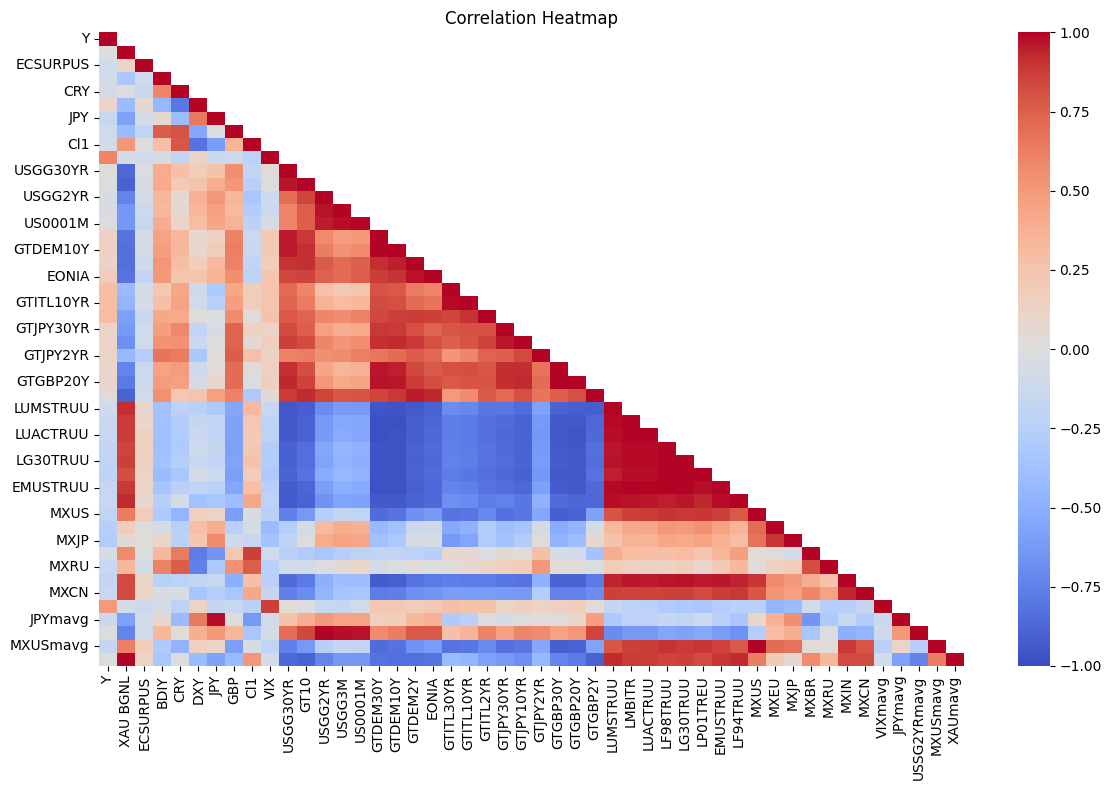

In [271]:
#get the correlation matrix
corr_matrix = numeric_df.corr()

#get the upper triangle of the correlation matrix to avoid duplicates
upper_triangle = np.triu(corr_matrix)

#create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix), k=1)

#set up the matplotlib figure
plt.figure(figsize=(12,8))

#create heatmap using seaborn
sns.heatmap(corr_matrix,
            mask=mask,
            annot=False,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#correlation between different columns
#red = positive correlation, blue = negative correlation (inverse)
#interested in 'Y' => VIX has the most correlation with Y

In [272]:
target = df['Y']
df = df[df.columns[-5:]]
inputs = df = df[df.columns[-5:]]
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [273]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

In [274]:
#XGB Boost
xgb_model = xgb.XGBClassifier(random_state=37)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)
df['XGB_prediction'] = xgb_model.predict(inputs)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       178
           1       0.74      0.72      0.73        43

    accuracy                           0.90       221
   macro avg       0.84      0.83      0.83       221
weighted avg       0.90      0.90      0.90       221



In [275]:
#Logistic Regression
lr_model = LogisticRegression(random_state=37)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)
df['LR_prediction'] = lr_model.predict(df[X_train.columns])


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       178
           1       0.62      0.30      0.41        43

    accuracy                           0.83       221
   macro avg       0.73      0.63      0.65       221
weighted avg       0.81      0.83      0.80       221



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [276]:
#build isolation forest model
inputs = ['VIXmavg', 'JPYmavg']

In [277]:
model_IF = IsolationForest(random_state=37) #outlier
model_IF.fit(df[inputs]) #train the model

IsolationForest(random_state=37)

In [278]:
#create 2 new columns
df['anomaly_scores'] = model_IF.decision_function(df[inputs]) #lower score, more abnormal
df['anomaly'] = model_IF.predict(df[inputs])

In [279]:
#slicing
df.loc[:,['VIXmavg','JPYmavg','anomaly_scores','anomaly']] #-1 if anomaly is present

,VIXmavg,JPYmavg,anomaly_scores,anomaly
9,23.259,107.508,0.082258,1
10,23.179,107.620,0.084226,1
11,23.515,107.666,0.085296,1
12,23.925,107.528,0.081469,1
13,24.305,107.447,0.081349,1
...,...,...,...,...
1106,22.624,106.135,0.071375,1
1107,22.261,106.776,0.080045,1
1108,21.771,107.396,0.082915,1
1109,20.880,107.805,0.079294,1


In [280]:
def outlier_plot(data,outlier_method_name, x_var, y_var, xaxis_limits=[0,1], yaxis_limits=[0,1]):
  method = f"{outlier_method_name}_anomaly"

  print(f"Number of anomalies {len(data[data['anomaly']==-1])}")
  print(f"Number of non-anomalies {len(data[data['anomaly']==1])}")
  print(f"Total Number of Values: {len(data)}")

  g = sns.FacetGrid(data, col="anomaly", height=4, hue="anomaly", hue_order=[1,-1])
  g.map(sns.scatterplot, x_var, y_var)
  g.fig.suptitle(f'Outlier Model: {outlier_method_name}', y=1.05)
  g.set(xlim=xaxis_limits, ylim=yaxis_limits)

  axes=g.axes.flatten()
  axes[0].set_title(f'Outliers {len(data[data["anomaly"]==-1])}')
  axes[1].set_title(f'Non-Outliers {len(data[data["anomaly"]==1])}')

  return g

Number of anomalies 323
Number of non-anomalies 779
Total Number of Values: 1102


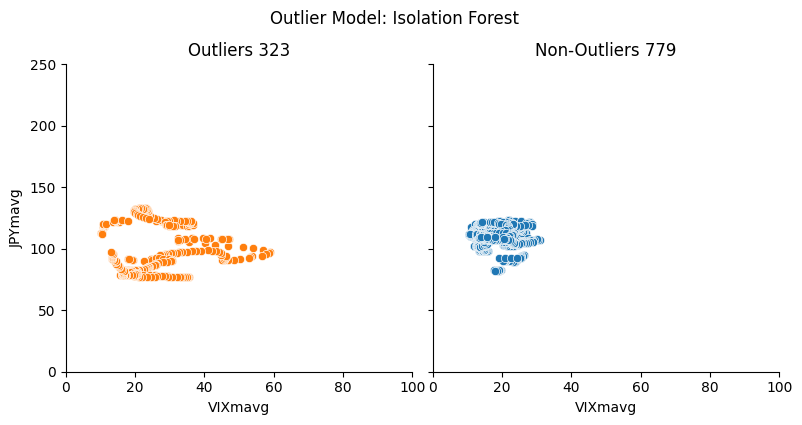

In [281]:
outlier_plot(df, "Isolation Forest",'VIXmavg', 'JPYmavg',[0,100],[0,250]);

In [282]:
#more parameters
inputs = ['VIXmavg', 'JPYmavg', 'USSG2YRmavg','MXUSmavg','XAUmavg']

In [283]:
model_IF = IsolationForest(random_state=37) #outlier
model_IF.fit(df[inputs])

IsolationForest(random_state=37)

In [284]:
df['anomaly_scores'] = model_IF.decision_function(df[inputs]) #lower score, more abnormal
df['anomaly'] = model_IF.predict(df[inputs])

Number of anomalies 287
Number of non-anomalies 815
Total Number of Values: 1102


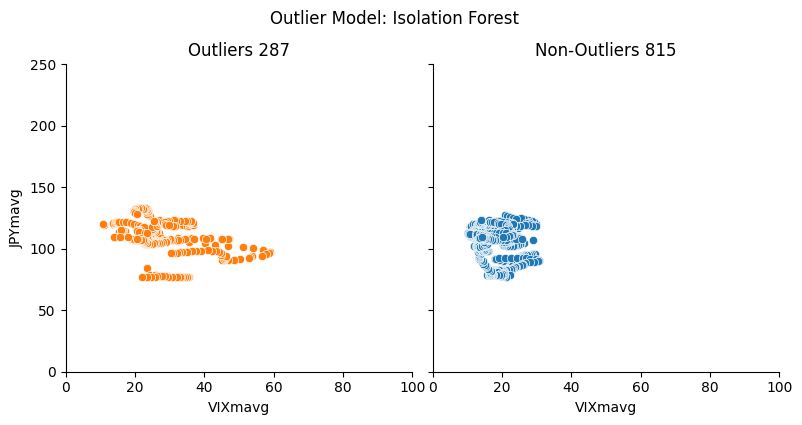

In [285]:
outlier_plot(df, "Isolation Forest",'VIXmavg', 'JPYmavg',[0,100],[0,250])

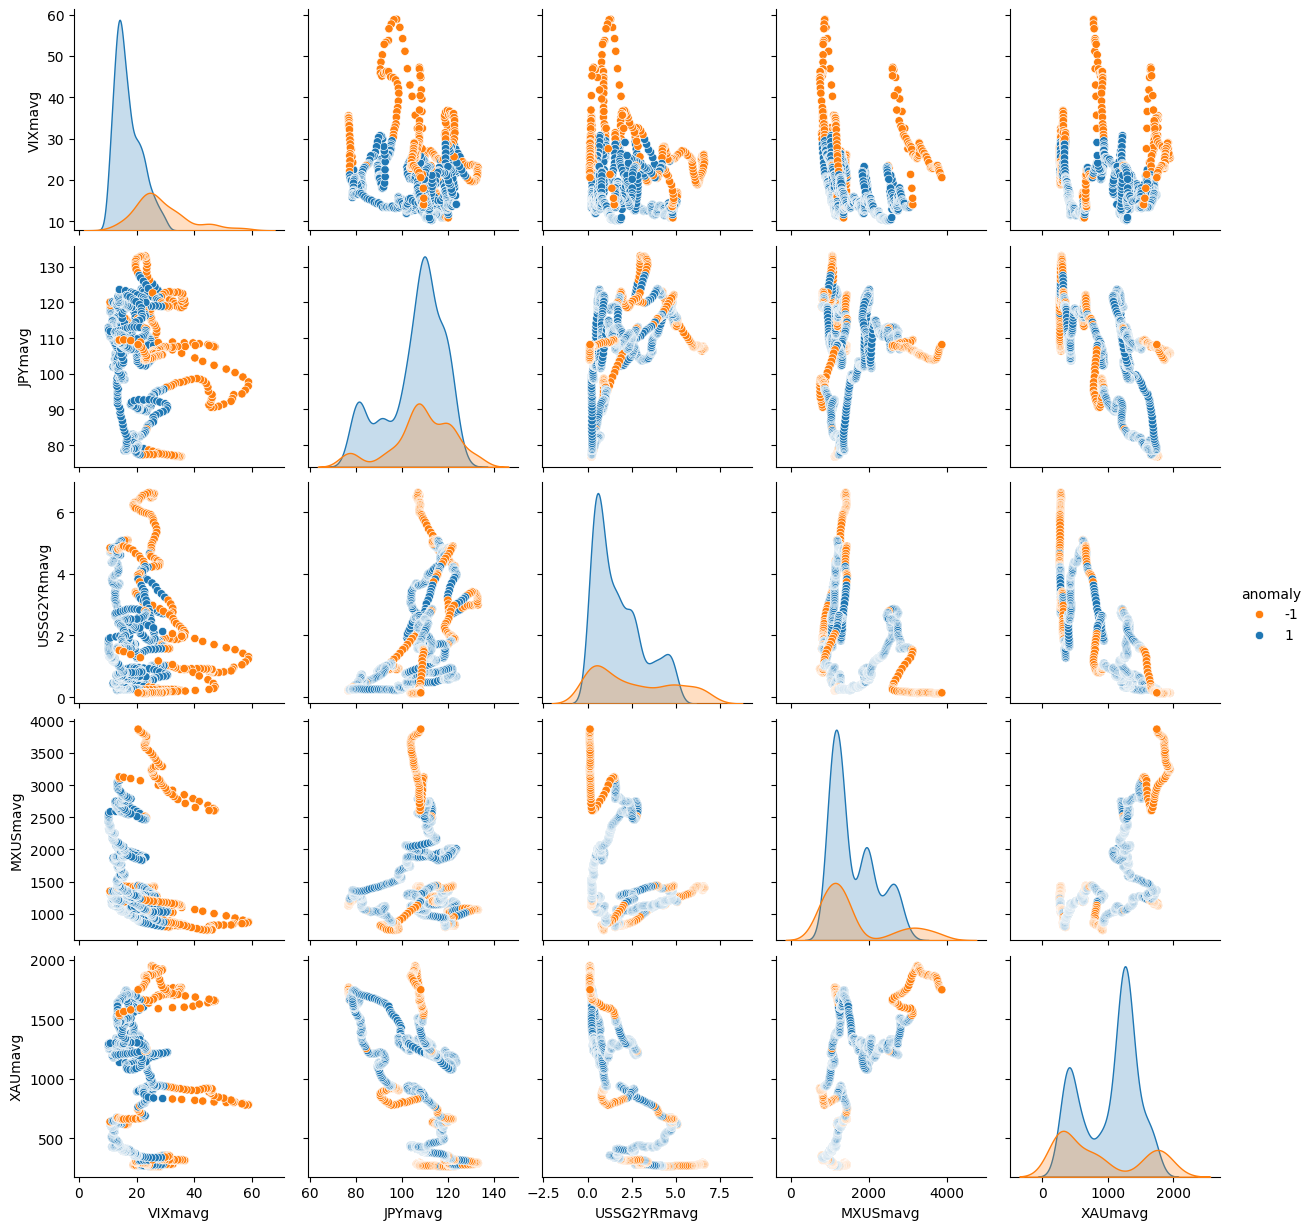

In [286]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars=inputs, hue='anomaly', palette=palette)
#shows the distribution of the orange

In [287]:
df['profit_loss'] = np.random.uniform(-1, 1, size=len(df))

def decision(anomaly, lr_pred, xgb_pred):
    if anomaly == -1:
        return "Sell stocks; Do not invest"
    elif lr_pred == 1 and xgb_pred == 1:
        return "Buy stocks; Invest"
    else:
        return "Sell stocks; Do not invest"

df['investment_decision'] = df.apply(
    lambda row: decision(row['anomaly'], row['LR_prediction'], row['XGB_prediction']), axis=1)
df['profit_with_strategy'] = df.apply(
    lambda row: row['profit_loss'] if row['investment_decision'] == "Buy stocks; Invest" else 0, axis=1
)

In [288]:
if 'profit_loss' in df.columns:
    df['profit_with_strategy'] = df.apply(
        lambda row: row['profit_loss'] if row['investment_decision'] == "Invest" else 0, axis=1
    )
    total_profit_with_strategy = df['profit_with_strategy'].sum()
    print(f"Total Profit with Strategy: {total_profit_with_strategy}")

    # Verify
    print(df[['profit_loss', 'investment_decision', 'profit_with_strategy']].head(20))
    total_profit_without_strategy = df['profit_loss'].sum()
    print(f"Total Profit without Strategy: {total_profit_without_strategy}")

Total Profit with Strategy: 0
    profit_loss         investment_decision  profit_with_strategy
9      0.107880  Sell stocks; Do not invest                     0
10    -0.220340  Sell stocks; Do not invest                     0
11    -0.280049  Sell stocks; Do not invest                     0
12    -0.295434  Sell stocks; Do not invest                     0
13    -0.250885  Sell stocks; Do not invest                     0
14    -0.348676  Sell stocks; Do not invest                     0
15     0.971075  Sell stocks; Do not invest                     0
16     0.995616  Sell stocks; Do not invest                     0
17     0.252461  Sell stocks; Do not invest                     0
18     0.068840  Sell stocks; Do not invest                     0
19     0.031130  Sell stocks; Do not invest                     0
20    -0.726156  Sell stocks; Do not invest                     0
21    -0.599973  Sell stocks; Do not invest                     0
22    -0.260394  Sell stocks; Do not invest   

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       178
           1       0.52      0.28      0.36        43

    accuracy                           0.81       221
   macro avg       0.68      0.61      0.63       221
weighted avg       0.78      0.81      0.79       221



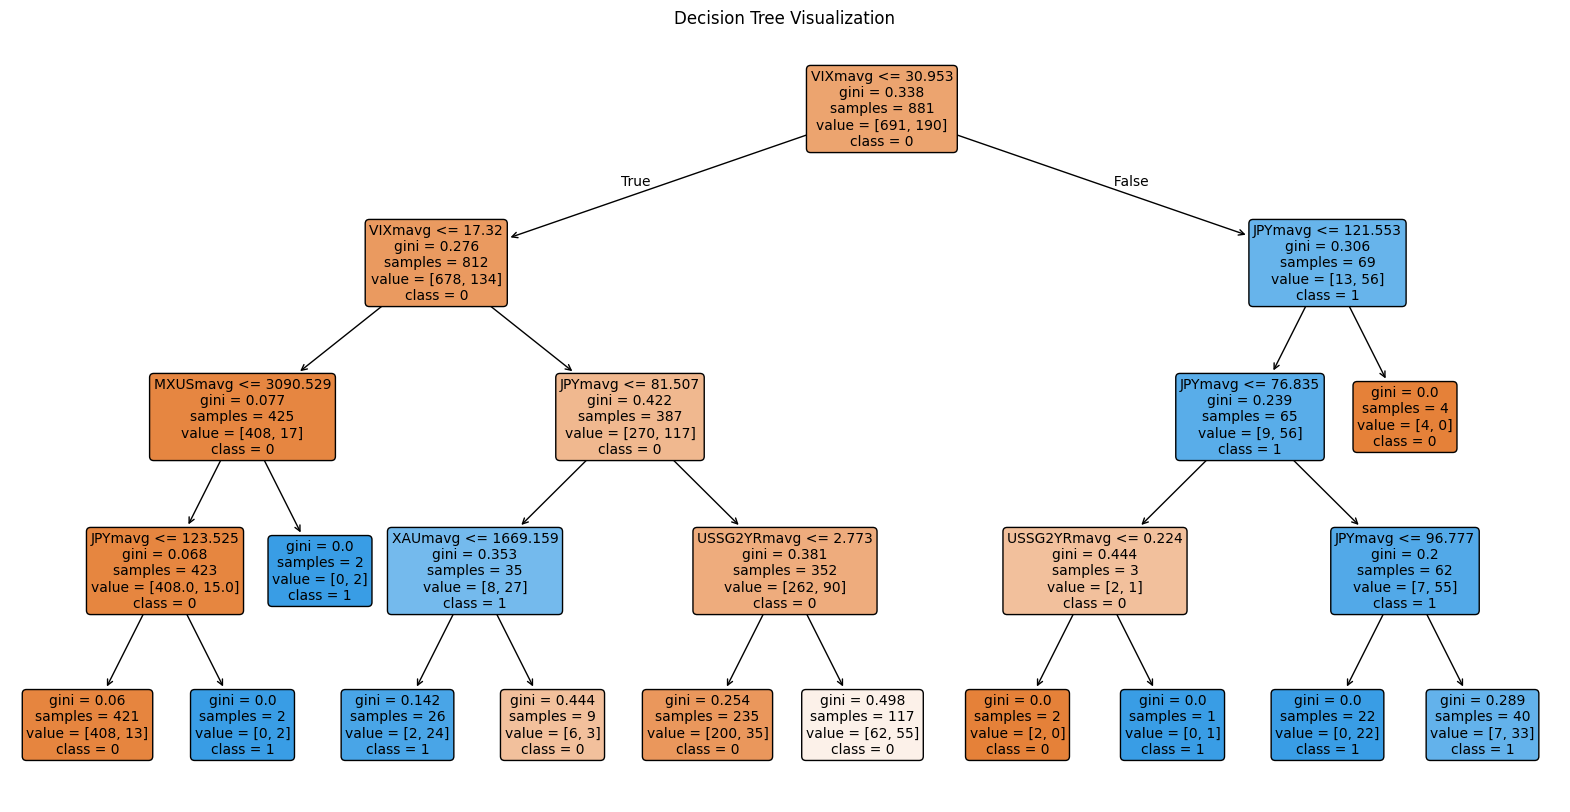

In [289]:
#visualize decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#create and train a decision tree classifier
dt = DecisionTreeClassifier(max_depth=4,random_state=42)
dt.fit(X_train,y_train)

print(classification_report(y_test, dt.predict(X_test)))

#create figure with larger size for better visibility
plt.figure(figsize=(20,10))

#plot the decision tree
plot_tree(dt,feature_names=X_train.columns, class_names=['0','1'],
          filled=True, rounded=True,fontsize=10)

plt.title("Decision Tree Visualization")
plt.show()